# Instagram_analysis for Aritzia

### Import Packages

In [1]:
import instaloader
import pandas as pd
import re
import xlrd
from google.cloud import vision
import os
import numpy as np
import nltk 
from nltk.tokenize import word_tokenize
import gensim.corpora as corpora
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models
import pickle 

## Task: to scrape data from Aritzia Instagram page
scraping the latest 500 images and related captions and the number of comments per post from Aritzia's Instagram page.

In [10]:
#scraping from Aritzia
L = instaloader.Instaloader(download_videos=False)
L.login(user="",passwd="")
df = pd.DataFrame()
posts = instaloader.Profile.from_username(L.context,'aritzia').get_posts()

i=0
for post in posts:
    df = df.append({'Caption': post.caption, 'Comments': post.comments, 'URL': post.url}, ignore_index=True)
    df.to_excel("Insta_download.xlsx",index=False)
    i = i+1
    if i>500:
        break

print("Written to Insta_download.xlsx file")

Written to Insta_download.xlsx file


## Task: to get image labels from Google Vision 

In [2]:
insta = pd.read_excel('Insta_download.xlsx')

In [3]:
insta_url = insta['URL']
insta_url.to_excel("insta_url.xlsx", header= False, index=False)

In [5]:
xlrd.xlsx.ensure_elementtree_imported(False, None)
xlrd.xlsx.Element_has_iter = True

Application_Credentials = 'My Project 74932-95eea7d0bd8b.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = Application_Credentials
client = vision.ImageAnnotatorClient()
image = vision.Image()

loc = ("insta_url.xlsx")
wb = xlrd.open_workbook(loc)
sheet = wb.sheet_by_index(0)
sheet.cell_value(0, 0)
df = pd.DataFrame()
# loop through every url, retrieve the image and send to google vision
for i in range(sheet.nrows):
    image_src_temp = sheet.cell_value(i, 0)
    image.source.image_uri = image_src_temp
    response = client.label_detection(image=image)
    labels = response.label_annotations
    l = []
    for label in labels:
        l.append(label.description)
    s = ' '.join(l)
    print("s")
    print(s)
    df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)
df.to_excel("GV_Output.xlsx",index=False)



s
Hair Joint Hand Outerwear Arm Shoulder Dress White Azure Neck


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)
/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s

s



/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Plant Automotive design Rectangle Ceiling Glass Event Art Shade Flooring Visual arts


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Skin Lip Plant Hairstyle Shoulder Flower Leg People in nature Flash photography


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Water Sky Cloud Plant Nature Azure Natural landscape Vegetation Arecales Sunlight


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Furniture Leg Sunglasses Vision care Wood Waist Thigh Comfort Goggles Street fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Cloud Flower Plant Sky Ecoregion Green Nature Natural landscape Natural environment Tree


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Flash photography Sleeve Knee Waist Street fashion Collar Thigh Fashion design Electric blue T-shirt


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Water Liquid Sky Rectangle Fluid Cloud Coastal and oceanic landforms Natural landscape Horizon Beach


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoulder White Azure Human body Neck Sleeve Waist Knee Street fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Lip Outerwear White Neck Street fashion Jaw Sleeve Gesture Collar


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear White Product Neck Sleeve Font T-shirt Fashion design Pattern Magenta


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Joint Sheath dress Head Hand One-piece garment Hairstyle Outerwear Arm Shoulder


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Plant Leaf Infrastructure Road surface Asphalt Yellow Tree Line Sidewalk Thoroughfare


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Wood Textile Beige Bag Grey Khaki Rectangle Headgear Font Tints and shades


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Trousers Shoulder White Muscle Neck Textile Waist Sleeve Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Hair Joint Head Chin Hand Outerwear Hairstyle Shoulder Arm


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Water Azure Natural landscape Plant Watercourse Formation Landscape Klippe Headland Wind wave


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Footwear Sky Plant Leg Tree Shorts Sleeve Waist Knee Luggage and bags


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoulder White Leg Product Black Dress Human body Shorts Fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Joint Racketlon Hand Tennis Arm Sports equipment Strings Shoulder Shorts


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Art Gas Electric blue Circle Pattern Aluminium Fashion accessory Symmetry Plastic Font


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Plant Botany Leaf People in nature Nature Tree Natural landscape Vegetation Wood Grass


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoulder Photograph Eyebrow Eye Facial expression Plant Happy Eyelash Petal Smile


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Cloud Sky Daytime Motor vehicle Road surface Asphalt Street light Thoroughfare Tar Landscape


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Hair Face Joint Head Plant Arm Shoulder Eye Human body


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Font Document Letter


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Arm Shoulder Leg Neck Flash photography Fashion Sleeve Waist Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Head Lip Outerwear Shoulder Flash photography Neck Eyelash Sleeve Gesture Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Muscle Leg Comfort Undershirt Neck Stomach Sleeve Knee Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Purple Flower Rectangle Violet Font Bag Material property Magenta Petal Cup


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Dance Art Artist Flash photography Entertainment Painting Fashion design Performing arts Choreography Event


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hand Shoulder Purple Toy Human body Textile Violet Window Pink Fashion design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoulder Swimsuit top Muscle Lingerie top Brassiere Human body Swimwear Waist Thigh Undergarment


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Automotive design Jaw Font Art Automotive exterior Logo Darkness Ceiling fixture Symmetry Electric blue


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Arm Flash photography Sky Beach Thigh People in nature Body of water Waist Swimwear Brassiere


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Jellyfish Marine invertebrates Bioluminescence Art Gas Electric blue Cnidaria Transparent material Plankton Invertebrate


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Product Wood Textile Table Beige Basic pump Clothes hanger Font High heels Rectangle


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Skin Head Jeans Hand Shoulder Eyelash Waist Sleeve Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Building Couch Table Furniture Comfort Window Cloud Wood Plant Textile


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Arm Stomach Muscle Human body Neck Sleeve Waist Flash photography Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Drinkware Tableware Stemware Wine Gesture Barware Drink Alcoholic beverage Champagne stemware Murphy's irish stout


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Suit trousers Hair Leg Light Lighting Sleeve Standing Suit Lamp Entertainment


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Shoulder Leg Human body Neck Waist Sleeve Purple Street fashion Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Glasses Footwear Joint Shoe Arm Shoulder Leg Sunglasses Human body Eyewear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sky Astronomical object Tints and shades Circle Art Magenta Peach Event Pattern Ball


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Shoe Leg Plant Window Human body Flowerpot Eyewear Street fashion Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Muscle Flash photography Thigh Waist Black hair Trunk Beauty Mesh Human leg Event


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Gesture Interaction Flash photography Happy Magenta Fun Event Sky Entertainment Sunset


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Brown Amber Orange Wood Tints and shades Pattern Peach Event Electric blue Art


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Microphone Performing arts Entertainment Fashion design Hat Street fashion Performance art Event Audio equipment Formal wear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Rectangle Font Slope Logo Brand Circle Carmine Number Parallel


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Stomach Shoulder Neck Jaw Sleeve Waist Thigh Gesture Knee Elbow


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Arm Leg Human body Sleeve Flash photography Knee Gesture Thigh Sportswear Black hair


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sleeve Gesture Headgear Elbow T-shirt Thumb Font Sign language Wrist Personal protective equipment


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoulder Arm Purple Human body Sleeve Headgear T-shirt Magenta Fashion design Jewellery


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoulder Arm White Product Human body Fashion Sleeve Standing Cartoon


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Wood Triangle Creative arts Gesture Finger Art Thumb Origami paper Nail Craft


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Cartoon Line Art Font Wood Illustration Sweetness Icing Visual arts Comfort food


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Mobile device Output device Communication Device Telephony Portable communications device Computer Gadget Space bar Font Office equipment


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Facial expression White Textile Neck Sleeve Gesture T-shirt Red Jersey


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Vision care Sleeve Street fashion Eyewear Flash photography Collar Door Fashion design Sunglasses Natural material


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Smile Outerwear Sky Workwear Sleeve Orange Tire Headgear Cool Happy


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Arm Dress shirt Human body Flash photography Street fashion Sleeve Comfort Eyewear Knee Collar


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Nose Cheek Skin Lip Eyebrow Eyelash Jaw Neck Flash photography


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear White Product Black Sleeve Grey Collar Magenta Material property Fashion design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Shoulder Stomach Shorts Neck Sleeve Waist Thigh Knee Flash photography


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Font Logo Brand Circle Rectangle Screenshot Graphics


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Smile Outerwear Sleeve Textile Jacket Street fashion Cool Jheri curl Happy Fashion design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Vision care Flash photography Purple Neck Textile Sleeve Street fashion Grey Jacket


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Nose Lip Mouth Sleeve Jacket Windbreaker Entertainment Personal protective equipment Electric blue Fashion design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Comfort Sleeve Knee Thigh Elbow Flooring Street fashion Human leg Fashion design Flash photography


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Jeans Leg Sleeve Street fashion Jacket Eyewear Leather jacket Denim Sunglasses


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Outerwear Shoulder White Neck Textile Sleeve Waist Thigh Chest


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Vertebrate Mammal Organism Cartoon Font Hat Happy Illustration Electric blue Musical instrument


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Table Green Rectangle Font Tree Wood Gambling Pattern Art Room


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Joint Arm Shoulder Fashion Neck Sleeve Waist Thigh Gesture


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoulder Stomach Human body Neck Sleeve Waist Gesture Bag Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Joint Hairstyle Shoulder Leg Shorts Muscle Fashion Neck Sleeve


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Tableware Liquid Drinkware Stemware Serveware Rectangle Champagne stemware Flooring Barware Dishware


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Lip Hairstyle Shoulder Fashion Neck Flash photography Textile Sleeve Street fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Snow People in nature Slope Happy Gesture Freezing Plant Headgear Tree Street fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Companion dog Feather Wing Tail Art Fur Liver Fashion accessory Darkness Natural material


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Property Comfort Decoration Plant Building Wood Bed frame Textile Interior design Floor


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Tableware Drinkware Mountain Dishware Coffee cup Snow Cup Table Serveware Slope


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Head Lip Eye White Eyelash Flash photography Tableware Comfort Sleeve Drinkware


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Table Font Rectangle Poster Event Pattern Paper Circle Art Paper product


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Hair Head Lip Outerwear Hairstyle Eyebrow Eye Eyelash White


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Plant Snow Wood Fawn Tree Trunk Carnivore Freezing Twig Winter


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Smile Skin Sky People in nature Tree Happy Gesture Jacket Travel Interaction


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Shoulder Glove White Human body Sleeve Purple Gesture Jacket Eyewear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Joint Outerwear Human body Sleeve Gesture Thigh Waist Electric blue Knee


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sky Mountain Cloud Smile People in nature Nature Snow Happy Travel Leisure


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Cheek Joint Skin Lip Chin Shoulder Eyebrow Active tank Muscle


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Black Human body Jaw Red Font Eyewear Horn Jewellery Personal protective equipment Foot


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Dog Carnivore Dog breed Companion dog Fawn Toy dog Working animal Toy Snout Poodle


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoe Tire Vehicle Shorts Sleeve Street fashion Orange Waist Knee Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Dog breed Dog Felidae Carnivore Companion dog Toy dog Tail Font Sporting Group Fur


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Outerwear Shoe Shoulder Latex clothing Street fashion Waist Sleeve Standing Eyewear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Car Land vehicle Outerwear Vehicle Shoe Hood Leg Automotive design Street fashion Wheel


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Photograph Window Fixture Sleeve Textile Street fashion Jacket Collar Leather jacket


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sleeve Street fashion Plant Cool Umbrella Jacket Fur clothing Leather jacket Thigh Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoulder Leg Latex clothing Fashion Human body Neck Sleeve Waist Latex


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Neck Eyelash Rectangle Sunglasses Art Chest Font Fashion accessory Fur


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Nose Face Brown Skin Head Chin Eyebrow Hairstyle Eye


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Brown Dog Snow Dog breed Carnivore Liver Pet supply Working animal Companion dog Fawn


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Joint Skin Lip Chin Hand Smile Shoulder Eyebrow Eyelash


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Leg Sleeve Temple Street fashion Waist Grey Road surface Hat Headgear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Rectangle Font Gadget Electronic device Technology Communication Device Logo Metal Graphics Brand


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Hair Joint Skin Lip Hairstyle Arm Shoulder Leg Human


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Footwear Joint Window Street fashion Standing Luggage and bags Bag Door Knee Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Leg Street fashion Wall Wood Waist Knee Brick Eyewear Thigh Human leg


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Building Plant Interior design Door Fixture Retail Shade Flowerpot Commercial building Houseplant


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Smile Lip Outerwear Shoulder Hat Fedora Neck Human body Flash photography


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Building Window Fixture Urban design Architecture Condominium Brick Tower block Wood Neighbourhood


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Food Tableware Ingredient Rectangle Dishware Cuisine Dish Kopi tubruk Drinkware Recipe


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Food Tableware Dishware Ingredient Bancha Plate Kitchen utensil Cuisine Serveware Recipe


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Tableware Dishware Serveware Body jewelry Wood Circle Font Metal Jewellery Rectangle


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Food Orange Cuisine Headgear Ingredient Personal protective equipment Electric blue Fashion accessory Recipe Dish


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
People in nature Plant Tree Branch Sky Happy Jacket Groundcover Shrub Landscape


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Purple Plant Pink Magenta Art Recreation Event Entertainment Sculpture Petal


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Food Drinkware Watch Drinking straw Cup Ingredient Tableware Drink Coffee Ti'punch


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Overcoat Sleeve Gesture Collar Trench coat Headgear Street fashion Blazer Fashion design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Smile Outerwear Dress Fashion Sleeve Overcoat Gesture Street fashion Waist Collar


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoe Leg Overcoat Fur clothing Sleeve Street fashion Trench coat Knee Thigh Fashion design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Joint Head Lip Outerwear Hairstyle Shoulder Eyebrow Eye Fur clothing


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Dog Carnivore Dog breed Tail Companion dog Feather Toy dog Fur Terrier Fashion accessory


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Head Outerwear Parka Eye Glove Snow Leg Human body Textile Sleeve


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Lip Shoulder Eye Flash photography Neck Sleeve Coat Grey Jacket Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear White Light Product Black Fashion Sleeve Font Grey Line


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Skin Lip Hairstyle Photograph Eyebrow Facial expression White Eyelash Organ Lipstick


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Snow Photograph Light Fashion People in nature Sleeve Standing Tartan Freezing Sky


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoe Leg Sky White Snow Flash photography Sleeve Slope Waist Knee


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Shoe Leg White Human Fashion Sleeve Snow People in nature Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Face Joint Smile Skin Outerwear Hairstyle Arm Photograph Shoulder


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Blue Purple Pink Font Material property Electric blue Pattern Design Event Magenta


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Hair Lip Outerwear Arm Stomach Fashion Sleeve Waist Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Face Joint Skin Lip Chin Hairstyle Arm Shoulder Eyebrow


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sharing Cartoon Gesture Happy Font Art Fictional character Drawing Graphics Conversation


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shorts Rolling Sky Sports equipment Elbow Happy Hat Knee Helmet Sneakers


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sky Blue Standing Happy Gesture Leisure Art T-shirt Balance Fun


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Smile Outerwear Military camouflage Camouflage Beard Human body Sleeve Gesture Flash photography Cool


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Leg Sky Gesture Finger Thigh Fun Cloud Thumb Street fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoulder Sunglasses Hood Green Blue Vision care Shorts Sleeve Automotive design Automotive lighting


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Vehicle Car Hood Automotive lighting Motor vehicle Automotive design Coat Orange Street fashion Vehicle door


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Hair Face Head Lip Outerwear Eyebrow White Black Flash photography


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Plant Rectangle Wood Font Tree Floor Flooring Wall Grass Brick


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Joint Skin Smile Head Lip Hand Outerwear Hairstyle Arm


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Arm Neck Sleeve Street fashion Collar Waist Natural material Fashion design Blazer Fashion model


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Nose Hair Cheek Head Lip Outerwear Eye Eyebrow Eyelash


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Toy Black Sleeve Font Line Red Entertainment Art Event Uniform


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Footwear Shoe Outerwear Leg Human body Fashion Sleeve Street fashion Gesture


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Lip Flash photography Street fashion Neck Sleeve Grey Wood Jacket Blazer


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hand Eye People in nature Tartan Human body Textile Dress Sleeve Flash photography Happy


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Nose Cheek Lip Smile Eyebrow Eyelash Mouth Ear Jaw Flash photography


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Fashion Gesture Pink Street fashion Costume hat Party hat Thigh Fashion design Entertainment Performing arts


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Rectangle Font Slope Parallel Circle Pattern Logo Office equipment Illustration Brand


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sky Trousers Water People on beach Leg People in nature Beach Sleeve Gesture Happy


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Skin Smile Head Outerwear Shoulder Fashion Human body Sleeve Textile Standing


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Surfboard Plant Sky Eyewear People in nature Sneakers Surfing Equipment Travel Happy Street fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Joint Lip Chin Hand Arm Shoulder Eyebrow Eye Mouth


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Lip Eyebrow Mouth Eyelash Comfort Flash photography Neck Textile Black-and-white


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoulder Leg Sleeve Knee Waist Thigh Street fashion Fashion design Eyewear Black hair


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Furniture Table Chair Wood Art Rectangle Flooring Desk Plywood Wood stain


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Lip Hairstyle Furniture Product Comfort Sleeve Street fashion Chair Collar Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Furniture Table Wood Publication Book Chair Rectangle Linens Wicker Art


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Outerwear Shoulder White Product Neck Human body Waist Sleeve Textile


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Joint Shoulder Eyewear Street fashion Sleeve Waist Knee Thigh Afro


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Skin Shoulder Arm Eyelash Neck Sleeve Waist Gesture Elbow


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Comfort Automotive design Art Interior design Sculpture Floor Flooring Table Linens Wood


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Automotive design Building Architecture Floor Flooring Ceiling Art Space Glass Luxury vehicle


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Plant Sky Snow Natural landscape Tree Freezing Bedrock Twig Geological phenomenon Formation


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Glasses Smile Outerwear Vision care Hairstyle Goggles Facial expression Sunglasses Sky Cloud


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sky Cloud Snow Mountain Slope Winter sport Gesture Outdoor recreation Ice cap People in nature


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Sky Blue Cloud Azure Glove Sleeve Jacket Freezing Cool


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Snow Sky Slope People in nature Gesture Ice cap Travel Polar ice cap Leisure Glacial landform


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Cloud Sky Slope Snow People in nature Winter sport Ice cap Ski Equipment Mountain Glacial landform


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Ecoregion Snow Slope Ice cap Atmospheric phenomenon Freezing Landscape Tree Glacial landform Polar ice cap


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Tennis Sports equipment Leg Tennis Equipment Shorts Soft tennis Knee Tennis player Strings Chair


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Hairstyle Outerwear Shirt Shoulder Arm Tartan Dress shirt Neck Fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sleeve Bag Undergarment Bat Font Fashion accessory Linens Carmine Magenta Tree


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Outerwear Shoulder Arm Photograph Muscle Leg White Product Fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Leg Sleeve Waist Thigh Gesture Undergarment Sportswear Human leg Personal protective equipment Font


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Joint Skin Shoulder Hairstyle Arm Leg Facial expression Muscle White


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shorts Active shorts Sports equipment Playing sports Streetball Leisure Player Grass Plant Sports


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Smile Hairstyle Arm Daytime Muscle White Leg Fashion Human body


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Plant Knee Grass Asphalt Thigh Tree Sky Sportswear Street fashion Recreation


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Tartan Shoulder White Neck Sleeve Street fashion Waist Fence Grey Plaid


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Stomach Arm Plant People in nature Blue Human body Flash photography Undershirt Neck Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Cheek Skin Joint Lip Chin Hairstyle Eyebrow Shoulder Eye


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Shoe Shoulder Leg Flash photography Waist Thigh People in nature Street fashion Knee


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Plant White Hat Sun hat Azure People in nature Sleeve Fedora Standing Fence


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Skin Lip Shoulder Sky Leg Tartan Plant People in nature Blue


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoe Leg Comfort Neck Flash photography Sleeve Waist Knee Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Hair Nose Cheek Lip Chin Eyelash Mouth Jaw Smile


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Joint Skin Lip Shoulder Arm Leg Neck Human body Flash photography


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoulder Eye Smile Neck Flash photography Sleeve Street fashion Happy Sky Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Dress shirt Street fashion Sleeve Collar Waist Suit Blazer Travel White-collar worker Formal wear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Car Wheel Land vehicle Tire White Street fashion Dress Fashion Eyewear Neck


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hairstyle Window Street fashion Fashion Textile Sleeve Standing Waist Overcoat Collar


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Photograph White Product Blue Purple Cartoon Font Gas Snapshot Games


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Active pants Sleeve sweatpant Sportswear Street fashion Smile Hat Grass Knee Cap


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Nose Smile Lip Vision care Eyelash Hat Mouth Neck Human body


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Trousers Shoe Purple Human body Sleeve Waist Gesture Thigh Knee Sportswear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Shoulder Neck Eyelash Flash photography Sleeve Cool Font Happy T-shirt


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Leg Sportswear Knee Elbow Leisure Fun Entertainment Performing arts Grass Competition event


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Photograph White Purple Cap Sleeve Hat Gesture Bag Pink Happy


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Footwear Land vehicle Shoe Hairstyle Car Photograph Wheel Street fashion Black


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Chin Arm Human body Neck Dress shirt Sleeve Street fashion Collar Waist Sportswear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Footwear Smile Shoe Leg Sleeve Dress shirt Flash photography Gesture Collar


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Footwear Car Land vehicle Vehicle Shoe Leg Hood Motor vehicle Automotive design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Face Skin Head Smile Lip Outerwear Eye Arm Photograph


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoulder Stomach White Neck Textile Sleeve Waist Thigh Grey


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Skin Head Plant Dress People in nature Sky Human body Flash photography Neck Sleeve


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Lip Outerwear Hairstyle Shoulder Photograph Facial expression People in nature Fashion Street fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Skin Sky Cloud Flash photography Plant Happy People in nature Grass Grassland Rural area


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Head Shoulder Eye Plant People in nature Dress shirt Dress Human body Flash photography


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Hair Lip Shoulder Smile People in nature Plant Flash photography Happy Eyewear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Dress shirt Human body Sleeve Waist Gesture Collar Fashion design Thigh Trunk Fashion model


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Hand Outerwear Shoulder Arm Human body Neck Flash photography Sleeve Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sky Water Ecoregion Plant People in nature Natural landscape Tree Gesture Grass Happy


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Nose Smile Cheek Skin Lip Chin Hairstyle Eyebrow Mouth


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Joint Shoe Shoulder Leg Dress Flowerpot Human body Neck Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Arm Active tank Leg Blue Azure Cycling shorts Jersey Human body Neck


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Footwear Outerwear Sky Sleeve Gesture Street fashion Travel Hat Happy T-shirt


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Building Window Sunglasses Street fashion Sleeve Waist Eyewear Knee Thigh Sportswear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Glasses Shoulder Vision care Photograph Sunglasses White Goggles Street fashion Eyewear Neck


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoe Tennis Racketlon Sports equipment Tennis racket Strings Tennis Equipment Leg Sports uniform Tennis player


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Table Furniture Product Lighting Interior design Flooring Floor studio couch Couch Wood


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Textile Interior design Style Wall Curtain Tints and shades Wood Fashion design Room Event


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Furniture Comfort Curtain Wood Interior design Table Flooring Shade Floor Couch


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Daytime Shoulder Tartan Sky People in nature Green People on beach Blue Trunks


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Lip Smile Hat Eyebrow People in nature Green Sun hat Fedora Eyelash


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Joint Water Shoulder Leg Light Azure Blue Fashion Neck


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Glasses Sky Cloud Shoulder Vision care yoga pant Plant Sunglasses Active pants Tree


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sunglasses Vision care White Leg Human body Neck Sleeve Waist Eyewear Standing


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Footwear Tennis Racketlon Tennis racket Strings Sports equipment Tennis player Leg Soft tennis Racket


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Font Brand Rectangle Signage Banner Graphics Logo Electric blue Carmine


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Nose Face Head Lip Smile Glasses Chin Eyebrow Human body


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Font Electric blue Graphics Brand Symmetry Rectangle


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Rectangle Font Magenta Brand Logo Graphics Electric blue


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Font Electric blue Signage Brand


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Hair Forehead Face Cheek Joint Skin Head Lip Chin


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Font Brand Rectangle Graphics Logo


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Nose Smile Cheek Skin Chin Hand Hairstyle Eyebrow Mouth


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Font Brand Rectangle Graphics Electric blue


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Joint Skin Lip Chin Eyebrow Shoulder Eyelash Muscle Mouth


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Product Font Rectangle Brand Publication Electric blue Signage Advertising Logo Graphics


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Smile Skin Lip Chin Hand Eyebrow Arm Shoulder Mouth Eyelash


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Font Book Publication Electric blue Rectangle Brand


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Product Sleeve Font Collar T-shirt Material property Magenta Active shirt Brand Logo


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Head Outerwear Helmet Product Sleeve Headgear Font Plastic bottle Rectangle Hat


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sleeve T-shirt Rectangle Font Electric blue Sportswear Shorts Logo Brand Graphics


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Footwear Joint Shoe Shoulder Building Sky Leg Skyscraper Fashion Street fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Joint Jeans Shoulder Arm White Shorts Azure Neck Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Muscle Flash photography Sleeve Sky Waist Gesture Street fashion Eyewear Sleeveless shirt Denim


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Sunglasses Azure Blue Neck Human body Jaw Waist Thigh Elbow


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Outerwear Dress One-piece garment Sky Human body Neck Sleeve Waist Orange


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Fluid Musical instrument Ingredient Serveware Material property Wood Helmet Staple food Vinegar Tints and shades


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Joint Outerwear Shoulder Arm Leg Muscle White Light Blue


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Arm Shoulder Muscle Stomach Human body Neck Waist Chest Undergarment


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Outerwear Shoulder Arm White Muscle Blue Green Neck Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Hairstyle Shoulder Sky White Eyewear Human body Street fashion Neck Shorts


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Joint Shoe Arm Photograph Leg Green White Muscle Plant


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Plant Smile Sleeve Street fashion Asphalt Sky Tree Sportswear Leisure Happy


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Arm One-piece garment Shoulder Human body Flash photography Neck Day dress Waist Sleeve


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Sky Shorts Hairstyle Shoulder Arm Photograph Stomach Leg Muscle


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Joint Shorts Leg Dress shirt One-piece garment Neck Sleeve Day dress Knee


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sky Tree Brassiere People on beach Thigh Swimwear Waist Knee Arecales Leisure


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Footwear Sky Cloud Muscle Flash photography Travel Thigh Waist Happy Leisure


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sky Shorts Cloud Thigh Knee People on beach Happy People in nature Barefoot Leisure


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shirt Dress Azure Human body Sleeve Coat Waist Rectangle Street fashion Fashion design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoulder Car Hood yoga pant Vehicle Sleeve Waist Sportswear Shorts Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Hair Chin Outerwear Eyebrow Shirt Eye Eyelash Neck Human body


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Flash photography Orange Entertainment Heat Event Darkness Electricity Midnight Fun Performance art


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sky Flash photography Sleeve Happy Street fashion Hat Pole Formal wear Bridge Fun


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Footwear Flash photography Fashion design Entertainment Event Street fashion Gadget Performing arts Flooring Font


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sky Vertebrate Green Sunglasses Tree Dog breed Fawn Carnivore Happy Fun


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoe Plant Shoulder Smile Leg Flash photography People in nature Happy Gesture Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Skin Photograph Flash photography People in nature Sky Happy Shorts Gesture Leisure Grass


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Cloud Sky Flash photography People in nature Sleeve Happy Hat Sun hat Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Shoe Arm Photograph Muscle White Light Human Fashion Black


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Shorts Water Cloud Arm Muscle People in nature Flash photography Human body Neck


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Head Eye Human body Natural material Pink Eyelash Feather Magenta Peach


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Plant Tree Terrestrial plant Rectangle Arecales Art Symmetry Flowering plant Painting Pattern


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Flower Petal Plant Terrestrial plant Tints and shades Flowering plant Magenta Peach Event Font


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Joint Sky Shoulder People in nature Dress Flash photography Neck Waist Standing


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Water Sky Natural environment Beach People in nature Happy Sunlight Thigh Travel


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Sky Arm Shoulder Leg Ecoregion Comfort People in nature Natural environment Human body


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoe Leg Sleeve Street fashion Waist Fashion design Knee Blazer Thigh Formal wear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Water Sky Fluid Cloud Liquid Natural landscape Horizon Beach Rectangle Landscape


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Sky People in nature Leg Plant Human body Flash photography Knee Happy Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Glasses Lip Sky Water Outerwear Cloud Shoulder Facial expression Sunglasses


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Arm Photograph Muscle Leg Dress Flash photography Fashion Automotive design Thigh Font


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Skin Sky Smile Shoulder Arm Leg One-piece garment Plant Flash photography


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Joint Hand Arm Shoulder Leg Neck Human body Flash photography Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Joint Hand Shoe Outerwear Arm Shoulder Leg Shorts Muscle


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoulder Comfort Neck Sleeve Knee Waist Thigh Elbow Fashion design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Cloud Sky Plant Branch Twig Vegetation Natural landscape Wood Grass Tints and shades


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sky Plant Cloud Building Neighbourhood Public space Font Real estate Facade Commercial building


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sleeve T-shirt Rectangle Font Active shirt Pattern Magenta Electric blue Sportswear Brand


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Lip Shoulder Eyebrow Eye Eyelash Comfort Azure Neck Human body


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Arm Shoulder Coat Cap Neck Sleeve Waist Street fashion Gesture


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Shoulder Vision care Sunglasses Dress shirt Street fashion Eyewear Textile Sleeve Standing


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Neck Sleeve Yellow Flash photography Thigh Waist Black hair Tableware Fashion design Trunk


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hairstyle Shoulder White Hood Eyelash Automotive design Automotive lighting Comfort Window Flash photography


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Font Electric blue Carmine Magenta Fashion accessory Graphics Illustration Brand Chair Logo


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Joint Hand Outerwear Shoulder Arm Leg Muscle Human body Knee


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Nose Face Cheek Skin Chin Eyebrow Eye Mouth Eyelash Jaw


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoulder Eyelash Neck Jaw Sleeve Comfort Elbow Layered hair Black hair


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Skin Lip Hand Shoulder White Muscle Human body Neck Sleeve


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Table Gold Lamp Shade Headgear Wood Rectangle Tints and shades Art Ceiling


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Lip Eye Eyelash Purple Human body Gesture Street fashion Black hair Happy Jacket


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Hand White Shorts Sleeve Thigh Gesture Street fashion Collar Blazer


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
White Orange Neck Sleeve Waist Collar Luggage and bags Red Shoulder bag Fashion design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Lip Mouth Muscle Eyelash Jaw Neck Gesture Black hair Long hair Flash photography


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Font Darkness Brand Photo caption Graphics Logo Monochrome photography


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Face Jeans Hand Shirt Shorts Hairstyle Dress shirt Fashion Human body


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Jeans Street fashion Neck Sleeve Waist Grey Collar Knee Fashion design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
White Leg Fashion Human body Dress shirt Neck Sleeve Comfort Thigh Collar


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Face Joint Lip Hairstyle Shoulder Neck Flash photography Eyelash Sleeve


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoe Leg Neck Sleeve Waist Street fashion Thigh Collar Knee Cool


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Outerwear Hairstyle White Fashion Street fashion Neck Textile Sleeve Grey


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear White Neck Fashion Sleeve Textile Street fashion Dress shirt Eyelash Collar


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint yoga pant Active pants Sleeve Waist Knee Thigh Flooring Sportswear Wood


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Sheath dress Lip Hairstyle Shoulder Arm Muscle Leg Fashion Dress


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoulder Product Neck Textile Sleeve Grey Collar Waist Denim Sportswear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Font Brand


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Font Brand Electric blue Logo Magenta Rectangle


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Flower Sky Plant People in nature Dress shirt Nature Green Natural landscape Natural environment Mountain


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoulder White Blue Neck Fashion Textile Sleeve Waist Street fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Joint Lip Chin Shoulder Eyebrow Muscle Eyelash Neck Fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Tartan Blue Dress shirt Textile Fashion Sleeve Plaid Waist Street fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Joint Outerwear Hand Shoulder Arm Photograph Shirt Green Blue


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Outerwear Green One-piece garment Fashion Neck Sleeve Standing Waist Gesture


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Cloud Outerwear White Sky Neck Sleeve Grey Collar Font Fashion design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Photograph Light Black Tartan Orange Textile Sleeve Yellow Plaid Baby & toddler clothing


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Skin Lip Hairstyle Shoulder Eyebrow Facial expression Eyelash Organ Neck


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Leg Flash photography Neck Sleeve Comfort Knee Waist Thigh Elbow Blazer


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Suit trousers Eye Leg Dress shirt Neck Human body Sleeve Comfort Smile


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Hand Leg Shorts Product Human body Neck Sleeve Waist Knee


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Dress shirt Sleeve Tie Gesture Grey Collar Font Handwriting Suit


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Hair Leg Product Human body Sleeve Waist Knee Thigh Grey


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Human body Flash photography Neck Sleeve Waist Gesture Elbow Gown Trunk Chest


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Leg Sleeve Beige Knee Overcoat Waist Thigh Street fashion Fashion design Blazer


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Suit trousers Shoulder Dress shirt Neck Sleeve Street fashion Collar Waist Fashion design Blazer


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoulder Neck Bag Dress Sleeve Gesture Grey Headgear Waist Armour


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Skin Lip Outerwear Shoulder Facial expression White Neck Eyelash Sleeve


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Arm Human body Flash photography Waist Sleeve Thigh Gesture Happy Abdomen Trunk


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Flower Plant Ecoregion Petal Art paint Paint Botany Painting Creative arts Art


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Eyelash Flash photography Neck Sleeve Gesture Waist Makeover Happy Thigh Fashion design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Hair Nose Cheek Skin Lip Chin Smile Hairstyle Eyebrow


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Hair Joint Outerwear White Human body Sleeve Street fashion Standing Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Face Joint Skin Head Hairstyle Arm Shoulder Muscle Dress


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Plant Flower Plant community Tree Deciduous Terrestrial plant Grass Groundcover Shrub Flowering plant


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Flash photography Happy Brassiere Gesture Thigh Comfort Font Long hair Waist Fashion design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Outerwear Neck Sleeve Waist Luggage and bags Knee Thigh Bag Fashion design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Smile Nose Head Lip Eyebrow Photograph Mouth Black Tooth Flash photography


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Head Hand Arm Facial expression Mouth Eyelash Neck Human body Sleeve Happy


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Cornrows Sleeve Gesture Jheri curl Smile Happy T-shirt Fashion design Braid Font


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sleeve Font Gesture Guitar accessory Musician Jersey T-shirt Happy Musical instrument accessory Music


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Trousers Shoe Neck Sleeve Waist Dress shirt Gesture Belt Collar


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Nose Cheek Skin Lip Smile Mouth Eyebrow Eye Facial expression


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sports uniform Outerwear Shirt Jersey Clothes hanger Neck Sports jersey Sleeve Collar Sportswear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Nose Hair Face Cheek Head Lip Chin Eyebrow Eyelash


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sky Water Daytime Vertebrate Light Human People in nature Flash photography Happy Standing


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Glasses Smile Outerwear Vision care Arm Shoulder Sunglasses Eyewear Sleeve Street fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sleeve Beige Street fashion Musical instrument Vintage clothing Fashion design Fur Costume Uniform Trench coat


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Joint Chin Shoulder Stomach Arm Leg Neck camisoles Undershirt


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Skin Lip Hand Hairstyle Shoulder Arm Facial expression Muscle Comfort


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Lip Arm Shoulder Leg Muscle Lipstick Neck Human body Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Joint Lip Outerwear Shoulder Neck Fashion Lipstick Sleeve Textile


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Joint Smile Hand Shoulder Arm Organ Neck Fashion Jaw


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Lip Human body Neck Sleeve Flash photography Street fashion Gesture Thigh Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Eyebrow Vision care Jheri curl Flash photography Neck Eyewear Gesture Collar Headgear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hairstyle Neck Sleeve Waist Street fashion Jacket Gesture Collar Thigh Headgear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Skin Outerwear Hairstyle Shoulder Comfort Neck Flash photography Knee Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Outerwear Hairstyle Shoulder Leg Street fashion Human body Knee Neck Sleeve


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Plant Sleeve Eyewear Street fashion Waist Fawn Fashion design Luggage and bags Sneakers Long hair


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Overcoat Building Dress shirt Street fashion Asphalt Sleeve Orange Trench coat Road surface Collar


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Joint Head Lip Hand Outerwear Hairstyle Shoulder Eyelash Neck


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Head Hairstyle Shoe Shoulder Comfort Sleeve Flash photography Grey Knee Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Lip Chin Hairstyle Shoulder Eyebrow Neck Human body Flash photography Eyelash Body jewelry


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Footwear Outerwear Shoe Smile Leg Street fashion Eyewear Sleeve Knee Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Smile Hairstyle Shoulder Arm Facial expression Organ Neck Sleeve Textile


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Lip Outerwear Vision care Sunglasses Goggles Purple Flash photography Sleeve Eyewear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
White Black Flash photography Black-and-white Standing Grey Style Symmetry Tints and shades Monochrome


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Water Sky Smile Arm Shoulder Photograph People in nature Human body Flash photography Neck


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoe Dress shirt Sleeve Knee Collar Street fashion Thigh Window Comfort


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Face Nose Cheek Skin Head Lip Eyebrow Shoulder Vision care


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Vision care Leg Sunglasses Street fashion Sleeve Knee Grey Waist Collar Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Lip Outerwear Neck Sleeve Street fashion Pink Collar Natural material Fashion design Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Smile Outerwear Shoulder Tartan Purple Street fashion Textile Sleeve Standing Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Lip Outerwear Hairstyle Arm Shoulder Cap Neck Flash photography Street fashion Fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoe Shoulder White Leg Comfort Picture frame Human body Textile Sleeve Knee


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoe Shoulder Leg Human Sleeve Comfort Gesture Grey Happy


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoe Shoulder Leg Street fashion Fashion Neck Sleeve Knee Standing


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoe Outerwear Shoulder Leg Overcoat Eyewear Luggage and bags Street fashion Neck


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoulder Leg Comfort Plant Fashion Neck Sleeve Thigh Knee


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Face Head Lip Sky Eye Flash photography Sleeve Glove Happy


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Comfort Knee Thigh Wood Floor Flooring Bed Hardwood Barefoot Human leg


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Lip Shoe Shoulder Flash photography Neck Sleeve Comfort Coat Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Nose Skin Chin Hairstyle Eyebrow Eye Mouth Facial expression Organ Jaw


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Glasses Sky Cloud Sunglasses Street fashion Eyewear Sleeve Standing Hat Asphalt


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Nose Skin Lip Chin Eyebrow Smile Shoulder Facial expression Mouth


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Plant Sky Asphalt Road surface Font Happy Grass People in nature T-shirt Landscape


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Smile Dress Textile Sleeve Font Flash photography Happy Flooring Wood Fashion design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Smile Plant Comfort Fur clothing Textile Couch Happy Natural material Fawn Picture frame


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Joint Skin Head Lip Shoe Shoulder Hairstyle Arm Mouth


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoe Plant Outerwear Shoulder Leg Street fashion Dress shirt Neck Human body


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoulder Leg Dress shirt Neck Sleeve Waist Street fashion Knee Flash photography


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Plant Shoulder Picture frame One-piece garment Neck Sleeve Waist Dress Standing


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Flash photography Latex clothing Sleeve Waist Eyewear Leather jacket Latex Street fashion Fashion design Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sleeve Flash photography Jacket Street fashion Tints and shades Magenta Electric blue Fashion design Recreation Fun


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoulder Dress shirt Human body Eyewear Neck Sleeve Street fashion Waist Automotive design Collar


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Neck Sleeve Cornrows Street fashion Waist Flash photography Fashion design Black hair Jacket Blazer


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Property Purple Light Product Textile Interior design Floor Line Violet Wall


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Fixture Facade Door Tints and shades Window Symmetry Rectangle Glass Building City


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Product Fashion Automotive design Interior design Building Floor Flooring Retail Beauty Fashion design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Brown Orange Material property Font Automotive design Event Wood Fashion accessory Goggles Brand


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Brown Wood Font Wall Material property Art Publication Design Graphics Visual arts


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Human Wood Book Publication Font Bookcase Flash photography Tints and shades Entertainment Darkness


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Tints and shades Wood Darkness Sitting Room Fun Event Visual arts Conversation Animation


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Skin Shoe Outerwear Hairstyle Shoulder Leg White Black Fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Outerwear Eyelash Vision care Glove Neck Ear Gesture Eyewear Audio equipment


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Joint Shoulder Leg Comfort Neck Flash photography Sleeve Waist Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Smile Human body Street fashion Textile Sleeve Standing Overcoat Gesture Collar


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoulder Leg Neck Dress shirt Waist Sleeve Knee Thigh Wood


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Glasses Sky People in nature Happy Grass Plant Headgear Grassland Landscape Tree


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sky Flash photography Sleeve Cloud Standing Happy Gesture Rectangle People in nature Event


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sky Cloud Hairstyle Shoulder Plant Flash photography Street fashion Neck Sleeve Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Sky Flash photography Sleeve Parka Street fashion Fur clothing Happy Animal product Headgear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Joint Outerwear Shoe Shoulder Leg Neck Knee Sleeve Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Azure Sleeve Comfort Street fashion Grey Flash photography Headgear Cap Electric blue


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Smile Lip Hairstyle Eyebrow Shoulder Flash photography Neck Fashion Sleeve


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoulder Neck Textile Sleeve Wood Comfort Fashion design Knee Thigh Human leg


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Kitchen sink Countertop Sink Cabinetry Tap Leg Plumbing fixture Kitchen appliance Kitchen Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Joint Outerwear Arm Shoulder Comfort Neck Sleeve Gesture Happy


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Hand Outerwear Leg Human body Flash photography Knee Sleeve Gesture Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Nose Cheek Lip Chin Eyebrow Mouth Flash photography Jaw Eyelash Iris


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Joint Head Lip Hand Outerwear Arm Shoulder Muscle Cornrows


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Eyebrow Shoulder Eye Eyelash Neck Jheri curl Sleeve Comfort Cornrows Ringlet


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Arm Sleeve Gesture Thigh Cornrows Wood Long hair Art Human leg Fashion design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Smile Arm Comfort Neck Sleeve Gesture Happy Finger Headgear Human leg


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Joint Outerwear Hairstyle Shoulder Eye Cornrows Neck Sleeve Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Arm Shoulder Leg Muscle Comfort Neck Sleeve Waist Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear White Organ Neck Sleeve Cap Headgear Happy Comfort Beauty


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Lip Outerwear White Neck Street fashion Flash photography Sleeve Textile Eyelash Fashion model


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Shoulder Street fashion Overcoat Sleeve Waist Trench coat Fashion design Blazer Fur clothing


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Window Fashion Sleeve Street fashion Standing Orange Thigh Knee Eyewear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Smile Skin Outerwear Eyebrow White Sleeve Happy Gesture Comfort


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Leg Comfort Neck Sleeve Gesture Thigh Collar Dress shirt Elbow


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Smile Skin Lip Hand Outerwear Hairstyle Arm Facial expression Human Fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Skin Lip Shoulder Shoe Leg Neck Flash photography Sleeve Standing


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hairstyle Fur clothing Vertebrate Parka Natural material Animal product Street fashion Mammal Feather Fawn


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Automotive lighting Automotive design Automotive exterior Vehicle door Motor vehicle Rectangle Font Art Display device Display case


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Gesture Sky Font Tree Display device Personal protective equipment Electronic device Rectangle Flash photography Electric blue


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Automotive design Rectangle Automotive lighting Automotive mirror Motor vehicle Vehicle door Automotive exterior Font Gadget Windscreen wiper


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Purple Output device Rectangle Violet Television set Line Gadget Magenta Sky Display device


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sleeve Rectangle Gadget Font Display device Electronic device Electric blue Fictional character Magenta Multimedia


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Arm Human body Flash photography Neck Sleeve Waist Gesture Comfort Thigh Elbow


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Smile Neck Sleeve Collar Street fashion Jacket Black hair Leather jacket Comfort Magenta


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Bag Luggage and bags Sleeve Grey Collar Automotive design Blazer Formal wear Electric blue


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Outerwear Hairstyle Photograph Shoulder Fashion Sleeve Flash photography Standing Street fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
White Light Product Sleeve Collar Material property Bag Automotive design Sports gear Motor vehicle


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Flash photography Sleeve Font Personal protective equipment Monochrome photography Jewellery Monochrome Leather jacket Bag Fashion accessory


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Font Electric blue Logo Brand Graphics Trademark


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Blue Smile Sleeve Eyewear Standing Sky Street fashion Waist Collar Knee


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Footwear Shoe Shoulder Leg Dress shirt Neck Sleeve Waist Street fashion Collar


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hand Outerwear Street fashion Sleeve Cap Gesture Flash photography Headgear Cool Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Joint Skin Lip Hand Outerwear Arm Shoulder Human body Eyelash


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Footwear Shoe Outerwear Shoulder Window Plant White Eyewear Neck Houseplant


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Leg Street fashion Flash photography Sleeve Waist Standing Knee Thigh Collar Denim


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear White Street fashion Sleeve Comfort Gesture Glove Finger Cap Cool


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Footwear Jeans Glasses Plant Leg Overcoat Window Sky Tree Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Building Window Photograph Street fashion Smile Sleeve Standing Gesture Collar Cool


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Overcoat Shoulder Trench coat Street fashion Sleeve Dress shirt Waist Collar Knee


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Face Hair Lip Chin Outerwear Hairstyle Shoulder Organ Human


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Hairstyle Shoulder Coat Black Street fashion Sky Neck Textile Sleeve


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Hair Lip Eyebrow Shoulder Cap Smile Eyewear Flash photography Neck


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Coat Overcoat Arm Human body Neck Sleeve Waist Street fashion Gesture Trench coat


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Footwear Outerwear Shoe Leg Street fashion Fashion Hat Sleeve Overcoat Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoe Photograph Sky Sleeve People in nature Cap Eyewear Hat Sneakers Street fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Plant People in nature Wood Glove Tree Natural landscape Terrestrial plant Trunk Grass Forest


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Glove Sky Tree Plant Sleeve Flash photography Headgear Eyewear Personal protective equipment Electric blue


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Car Land vehicle Wheel Vehicle Tire Window Building Hood Motor vehicle Automotive design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sky Dress shirt Sleeve Gesture Asphalt Grey Waist Street fashion Tree Blazer


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Glasses Shoulder Vision care Dress shirt Eyewear Neck Human body Comfort Sunglasses Sleeve


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Building Outerwear Shoe Window Flowerpot Leg Plant Street fashion Standing Houseplant


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Blue Window Street fashion Azure Building Textile Sleeve Standing Sky


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoe Window Leg Building Street fashion Fashion Road surface Standing Knee Wood


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Skin Lip Shoulder Eye Facial expression Blue Leg Organ Black


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Lip Outerwear Arm Shoulder Street fashion Fashion Neck Textile Sleeve


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Smile Outerwear Photograph Plant Blue Street fashion Azure Sleeve Glove Jacket


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Photograph Plant White Sleeve Textile Street fashion Collar Overcoat Grass


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Shoulder Overcoat Leg Street fashion Window Sleeve Fur clothing Standing Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Shoulder Window Natural material Fur clothing Animal product Street fashion Fashion Textile Eyewear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Cloud Sky Natural landscape Font Morning Happy Plant Landscape Poster Publication


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hand Outerwear Arm Mouth White Vision care Television Flash photography Eyewear Gesture


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Nose Smile Lip Chin Eyebrow Eye Eyelash Jheri curl Black


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/975253196.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


In [3]:
labels = pd.read_excel('GV_Output.xlsx')

In [4]:
labels = labels.dropna()

In [5]:
labels.head()

,URL,Labels
0,https://instagram.fyhu1-1.fna.fbcdn.net/v/t51....,Hair Joint Hand Outerwear Arm Shoulder Dress W...
3,https://instagram.fyhu1-1.fna.fbcdn.net/v/t51....,Plant Automotive design Rectangle Ceiling Glas...
4,https://instagram.fyhu1-1.fna.fbcdn.net/v/t51....,Joint Skin Lip Plant Hairstyle Shoulder Flower...
5,https://instagram.fyhu1-1.fna.fbcdn.net/v/t51....,Water Sky Cloud Plant Nature Azure Natural lan...
6,https://instagram.fyhu1-1.fna.fbcdn.net/v/t51....,Furniture Leg Sunglasses Vision care Wood Wais...


## Task: perform topic modeling on labels
### necessary data process steps

In [7]:
punctuation_tokenizer = nltk.WordPunctTokenizer()
stop = nltk.corpus.stopwords.words('english')
lemmer = nltk.WordNetLemmatizer()
def norm(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    text = text.strip()

    words = punctuation_tokenizer.tokenize(text)
    filtered_words = [word for word in words if word not in stop]
    lemmer_text = [lemmer.lemmatize(i) for i in filtered_words]
    lemmer_text = [word for word in lemmer_text if not word.isnumeric()]

    text = ' '.join(lemmer_text)

    return text

def coherence(df, dic, summaries, finish, begin, step):
    values = []
    a_list = []

    for topics in range(begin, finish, step):
        lda = gensim.models.LdaMulticore(corpus=df, id2word=dic, num_topics=topics, chunksize=100, passes=500, per_word_topics=True, random_state=100)
        a_list.append(lda)

        coherence = CoherenceModel(model=lda, texts=summaries, dictionary=dic, coherence='c_v')
        values.append(coherence.get_coherence())

    return a_list, values

norma = np.vectorize(norm)
norm_insta = norma(labels['Labels'])


In [14]:
token_norm_df = [word_tokenize(i) for i in norm_insta]
dic = corpora.Dictionary(token_norm_df)
dic.filter_extremes()

summaries = token_norm_df
df1 = [dic.doc2bow(i) for i in summaries]

In [16]:
num_of_topics_start = 2
num_of_topics_end = 10
model_list, coherence_values = coherence(df1, dic, summaries, num_of_topics_end, num_of_topics_start, 1)


## Task: to find out the optimum number of topics

### Methodology
I parsed image labels from Google Vision based on the url I had in the original dataset, and removed some rows with no label. And then I lemmatized and tokenized the selected labels for better measurement. 

To increase the reliability of my topic modeling result, I then evaluated at which threshold is the optimal number of topics for these documents to yield the highest coherence score.
According to the coherence - topics graphs below, the coherence score is highest when the number of topics is at 5. Since Aritzia is basically advertizing clothes, it also makes sense to divide the topic into 5 categories. 

Thus, I decided to choose to generate 5 main topics for the selected labels. 

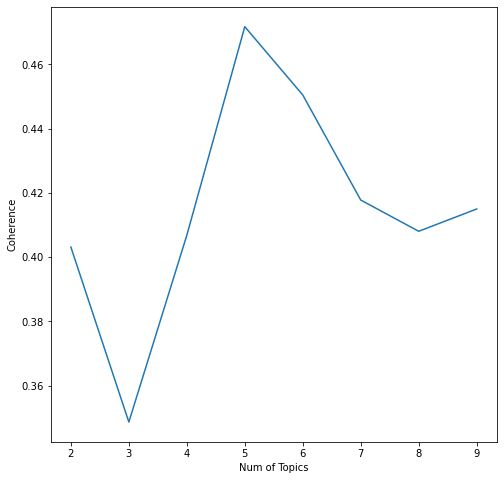

In [17]:
x_axis = range(num_of_topics_start, num_of_topics_end, 1)
ax = plt.subplots(figsize=(8,8))
plt.plot(x_axis, coherence_values)
plt.xlabel('Num of Topics')
plt.ylabel('Coherence')
plt.show()

In [18]:
# Final model with best # of topics
lda = gensim.models.LdaMulticore(corpus=df1, id2word=dic, num_topics=5, chunksize=100, passes=500, per_word_topics=True, random_state=100)


In [19]:
coherence_model1 = CoherenceModel(model=lda, texts=summaries, dictionary=dic, coherence='c_v')
score = coherence_model1.get_coherence()
print('Score', score)

Score 0.4480429308532585


In [20]:
pprint(lda.print_topics(num_topics=5))
dic_lda = lda[df1]

[(0,
  '0.082*"design" + 0.063*"automotive" + 0.047*"vehicle" + 0.045*"bag" + '
  '0.032*"fur" + 0.030*"device" + 0.030*"dog" + 0.029*"flooring" + '
  '0.028*"fashion" + 0.026*"material"'),
 (1,
  '0.093*"sky" + 0.073*"plant" + 0.061*"happy" + 0.056*"nature" + '
  '0.055*"people" + 0.033*"flash" + 0.032*"photography" + 0.031*"tree" + '
  '0.030*"cloud" + 0.028*"human"'),
 (2,
  '0.098*"font" + 0.060*"art" + 0.053*"rectangle" + 0.045*"blue" + '
  '0.044*"electric" + 0.032*"brand" + 0.032*"equipment" + 0.029*"wood" + '
  '0.028*"shade" + 0.027*"event"'),
 (3,
  '0.108*"fashion" + 0.096*"sleeve" + 0.063*"street" + 0.056*"waist" + '
  '0.046*"neck" + 0.039*"leg" + 0.037*"outerwear" + 0.033*"thigh" + '
  '0.033*"shoulder" + 0.028*"knee"'),
 (4,
  '0.065*"shoulder" + 0.057*"lip" + 0.049*"human" + 0.047*"arm" + '
  '0.046*"joint" + 0.044*"body" + 0.038*"hair" + 0.038*"neck" + 0.032*"skin" + '
  '0.031*"eyelash"')]


In [21]:
#visualize topic modeling result
import pyLDAvis
import pyLDAvis.gensim_models
import pickle 

pyLDAvis.enable_notebook()
graph = pyLDAvis.gensim_models.prepare(lda, df1, dic)
graph
pyLDAvis.save_html(graph, 'lda.html')

/Users/zorak/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/zorak/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/zorak/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/zorak/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/zorak/opt/anaconda3/lib/python3.9/

##  Task: Report the top 25 words for each topic and give a suitable name
Topic 1: fashion, sleeve, street, waist, neck, leg, outerwear, thigh, shoulder, knee, collar, joint, dress, textile, shoe, gesture, white, shirt, flash, photography, comfort, standing, eyewear, design, clothing.

Name for topic 1: Types of clothing


Topic 2: shoulder, lip, human, arm, joint, body, hair, neck, skin, eyelash, hairstyle, eyebrow, face, outerwear, smile, flash, photography, head, muscle, hand, eye, chin, nose, mouth, sleeve.

Name for topic 2: Parts of the body

Topic 3: sky, plant, happy, nature, people, flash, photography, tree, cloud, human, landscape, gesture, natural, grass, body, hat, water, snow, sleeve, sportswear, thigh, elbow, stomach, cap, waist.

Name for topic 3: Natural scenery

Topic 4: font, art, rectangle, blue, electric, brand, equipment, wood, shade, event, magenta, logo, tint, graphic, tshirt, sport, enntertainment, accessory, design, table, photography, fun, gesture, pattern, personal.

Name for topic 4: Appearance design

Topic 5: design, automotive, vehicle, bag, fur, device, dog, flooring, fashion, material, building, wood, product, floor, luggage, trench, window, natural, motor, interior, door, fawn, lighting, comfort, hood. 

Name for topic 5: Home decoration 

## Task: find out the highest and the lowest quartiles based on engagement

Sort the data from high to low engagement (measured by the number of comments), and take the highest and the lowest quartiles.

In [8]:
insta_sorted = insta.sort_values(by = ["Comments"])

In [23]:
500*(1/4)

125.0

In [9]:
lowest = insta_sorted.head(125)
highest = insta_sorted.tail(125)

## Task: to get the labels for posts in the highest and the lowest quartiles

In [25]:
lowest_url = lowest['URL']
lowest_url.to_excel("lowest_url.xlsx", header= False, index=False)
highest_url = highest['URL']
highest_url.to_excel("highest_url.xlsx", header= False, index=False)

In [26]:
Application_Credentials = 'My Project 74932-95eea7d0bd8b.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = Application_Credentials
client = vision.ImageAnnotatorClient()
image = vision.Image()

loc = ("lowest_url.xlsx")
wb = xlrd.open_workbook(loc)
sheet = wb.sheet_by_index(0)
sheet.cell_value(0, 0)
df = pd.DataFrame()
# loop through every url, retrieve the image and send to google vision
for i in range(sheet.nrows):
    image_src_temp = sheet.cell_value(i, 0)
    image.source.image_uri = image_src_temp
    response = client.label_detection(image=image)
    labels = response.label_annotations
    l = []
    for label in labels:
        l.append(label.description)
    s = ' '.join(l)
    print("s")
    print(s)
    df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)
df.to_excel("GV_lowest.xlsx",index=False)

s
Nose Cheek Lip Smile Eyebrow Eyelash Mouth Ear Jaw Flash photography


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Toy Black Sleeve Font Line Red Entertainment Art Event Uniform


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Brown Amber Orange Wood Tints and shades Pattern Peach Event Electric blue Art


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Joint Skin Smile Head Lip Hand Outerwear Hairstyle Arm


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Companion dog Feather Wing Tail Art Fur Liver Fashion accessory Darkness Natural material


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Skin Sky Cloud Flash photography Plant Happy People in nature Grass Grassland Rural area


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Chin Arm Human body Neck Dress shirt Sleeve Street fashion Collar Waist Sportswear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Shoulder Neck Eyelash Flash photography Sleeve Cool Font Happy T-shirt


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Plant Knee Grass Asphalt Thigh Tree Sky Sportswear Street fashion Recreation


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Cloud Sky Plant Branch Twig Vegetation Natural landscape Wood Grass Tints and shades


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Hair Nose Cheek Skin Lip Chin Smile Hairstyle Eyebrow


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sky Flash photography Sleeve Happy Street fashion Hat Pole Formal wear Bridge Fun


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Eyebrow Shoulder Eye Eyelash Neck Jheri curl Sleeve Comfort Cornrows Ringlet


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Nose Smile Lip Vision care Eyelash Hat Mouth Neck Human body


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sleeve Flash photography Jacket Street fashion Tints and shades Magenta Electric blue Fashion design Recreation Fun


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Eyelash Flash photography Neck Sleeve Gesture Waist Makeover Happy Thigh Fashion design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sky Blue Standing Happy Gesture Leisure Art T-shirt Balance Fun


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Human Wood Book Publication Font Bookcase Flash photography Tints and shades Entertainment Darkness


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoulder Photograph Eyebrow Eye Facial expression Plant Happy Eyelash Petal Smile


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Fashion Gesture Pink Street fashion Costume hat Party hat Thigh Fashion design Entertainment Performing arts


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Skin Lip Hairstyle Photograph Eyebrow Facial expression White Eyelash Organ Lipstick


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Plant Smile Sleeve Street fashion Asphalt Sky Tree Sportswear Leisure Happy


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Joint Hand Outerwear Arm Shoulder Dress White Azure Neck


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Hair Leg Product Human body Sleeve Waist Knee Thigh Grey


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoulder Car Hood yoga pant Vehicle Sleeve Waist Sportswear Shorts Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Shorts Water Cloud Arm Muscle People in nature Flash photography Human body Neck


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shorts Rolling Sky Sports equipment Elbow Happy Hat Knee Helmet Sneakers


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Lip Shoulder Eyebrow Eye Eyelash Comfort Azure Neck Human body


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hand Outerwear Arm Mouth White Vision care Television Flash photography Eyewear Gesture


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Face Skin Head Smile Lip Outerwear Eye Arm Photograph


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Muscle Flash photography Thigh Waist Black hair Trunk Beauty Mesh Human leg Event


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Surfboard Plant Sky Eyewear People in nature Sneakers Surfing Equipment Travel Happy Street fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Water Sky Fluid Cloud Liquid Natural landscape Horizon Beach Rectangle Landscape


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Tartan Shoulder White Neck Sleeve Street fashion Waist Fence Grey Plaid


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Hair Face Joint Head Plant Arm Shoulder Eye Human body


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hand Eye People in nature Tartan Human body Textile Dress Sleeve Flash photography Happy


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Sky Shorts Hairstyle Shoulder Arm Photograph Stomach Leg Muscle


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sky Water Ecoregion Plant People in nature Natural landscape Tree Gesture Grass Happy


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Joint Shoulder Leg Comfort Neck Flash photography Sleeve Waist Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Plant White Hat Sun hat Azure People in nature Sleeve Fedora Standing Fence


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Font Brand Rectangle Graphics Logo


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Suit trousers Hair Leg Light Lighting Sleeve Standing Suit Lamp Entertainment


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoulder Swimsuit top Muscle Lingerie top Brassiere Human body Swimwear Waist Thigh Undergarment


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sleeve Beige Street fashion Musical instrument Vintage clothing Fashion design Fur Costume Uniform Trench coat


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Dance Art Artist Flash photography Entertainment Painting Fashion design Performing arts Choreography Event


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Active pants Sleeve sweatpant Sportswear Street fashion Smile Hat Grass Knee Cap


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Plant Tree Terrestrial plant Rectangle Arecales Art Symmetry Flowering plant Painting Pattern


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Plant Snow Wood Fawn Tree Trunk Carnivore Freezing Twig Winter


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shorts Active shorts Sports equipment Playing sports Streetball Leisure Player Grass Plant Sports


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Footwear Flash photography Fashion design Entertainment Event Street fashion Gadget Performing arts Flooring Font


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Joint Head Lip Outerwear Hairstyle Shoulder Eyebrow Eye Fur clothing


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Smile Lip Hairstyle Eyebrow Shoulder Flash photography Neck Fashion Sleeve


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Hair Chin Outerwear Eyebrow Shirt Eye Eyelash Neck Human body


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Head Eye Human body Natural material Pink Eyelash Feather Magenta Peach


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoe Plant Outerwear Shoulder Leg Street fashion Dress shirt Neck Human body


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Shoulder Leg Human body Neck Waist Sleeve Purple Street fashion Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Head Outerwear Parka Eye Glove Snow Leg Human body Textile Sleeve


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shirt Dress Azure Human body Sleeve Coat Waist Rectangle Street fashion Fashion design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Arm Photograph Muscle Leg Dress Flash photography Fashion Automotive design Thigh Font


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Hair Nose Cheek Lip Chin Eyelash Mouth Jaw Smile


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Tableware Drinkware Mountain Dishware Coffee cup Snow Cup Table Serveware Slope


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Skin Lip Hairstyle Shoulder Eyebrow Facial expression Eyelash Organ Neck


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Dress shirt Human body Sleeve Waist Gesture Collar Fashion design Thigh Trunk Fashion model


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Nose Smile Lip Chin Eyebrow Eye Eyelash Jheri curl Black


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Font Electric blue Signage Brand


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Neck Eyelash Rectangle Sunglasses Art Chest Font Fashion accessory Fur


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoe Photograph Sky Sleeve People in nature Cap Eyewear Hat Sneakers Street fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Plant Botany Leaf People in nature Nature Tree Natural landscape Vegetation Wood Grass


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Hand Leg Shorts Product Human body Neck Sleeve Waist Knee


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Tableware Liquid Drinkware Stemware Serveware Rectangle Champagne stemware Flooring Barware Dishware


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Hair Face Head Lip Outerwear Eyebrow White Black Flash photography


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Photograph White Purple Cap Sleeve Hat Gesture Bag Pink Happy


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sky Flash photography Sleeve Cloud Standing Happy Gesture Rectangle People in nature Event


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Footwear Joint Shoe Shoulder Building Sky Leg Skyscraper Fashion Street fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoulder Sunglasses Hood Green Blue Vision care Shorts Sleeve Automotive design Automotive lighting


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Face Joint Lip Hairstyle Shoulder Neck Flash photography Eyelash Sleeve


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Nose Face Brown Skin Head Chin Eyebrow Hairstyle Eye


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Plant People in nature Wood Glove Tree Natural landscape Terrestrial plant Trunk Grass Forest


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Lip Flash photography Street fashion Neck Sleeve Grey Wood Jacket Blazer


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sleeve Bag Undergarment Bat Font Fashion accessory Linens Carmine Magenta Tree


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Table Gold Lamp Shade Headgear Wood Rectangle Tints and shades Art Ceiling


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Shoe Arm Photograph Muscle White Light Human Fashion Black


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Jeans Sky Plant People in nature Flash photography Happy Gesture Sunlight Grass


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Muscle Leg Comfort Undershirt Neck Stomach Sleeve Knee Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Gesture Interaction Flash photography Happy Magenta Fun Event Sky Entertainment Sunset


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Skin Lip Shoulder Sky Leg Tartan Plant People in nature Blue


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Smile Arm Comfort Neck Sleeve Gesture Happy Finger Headgear Human leg


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Arm Neck Sleeve Street fashion Collar Waist Natural material Fashion design Blazer Fashion model


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Hair Lip Outerwear Arm Stomach Fashion Sleeve Waist Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoulder Eye Smile Neck Flash photography Sleeve Street fashion Happy Sky Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Flower Petal Plant Terrestrial plant Tints and shades Flowering plant Magenta Peach Event Font


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Gesture Sky Font Tree Display device Personal protective equipment Electronic device Rectangle Flash photography Electric blue


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sky Shorts Cloud Thigh Knee People on beach Happy People in nature Barefoot Leisure


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Arm Shoulder Leg Neck Flash photography Fashion Sleeve Waist Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Smile Outerwear Military camouflage Camouflage Beard Human body Sleeve Gesture Flash photography Cool


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Overcoat Sleeve Gesture Collar Trench coat Headgear Street fashion Blazer Fashion design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Skin Lip Outerwear Shoulder Facial expression White Neck Eyelash Sleeve


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Water Sky Natural environment Beach People in nature Happy Sunlight Thigh Travel


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Lip Outerwear White Neck Street fashion Jaw Sleeve Gesture Collar


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Joint Skin Lip Shoulder Arm Leg Neck Human body Flash photography


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Photograph Window Fixture Sleeve Textile Street fashion Jacket Collar Leather jacket


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Joint Lip Chin Hand Arm Shoulder Eyebrow Eye Mouth


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Joint Outerwear Shoe Shoulder Leg Neck Knee Sleeve Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Shoulder Overcoat Leg Street fashion Window Sleeve Fur clothing Standing Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoulder Leg Neck Dress shirt Waist Sleeve Knee Thigh Wood


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Dog Carnivore Dog breed Tail Companion dog Feather Toy dog Fur Terrier Fashion accessory


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Flash photography Orange Entertainment Heat Event Darkness Electricity Midnight Fun Performance art


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Smile Skin Sky People in nature Tree Happy Gesture Jacket Travel Interaction


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
People in nature Plant Tree Branch Sky Happy Jacket Groundcover Shrub Landscape


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Leg Street fashion Flash photography Sleeve Waist Standing Knee Thigh Collar Denim


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Arm Shoulder Coat Cap Neck Sleeve Waist Street fashion Gesture


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Neck Sleeve Yellow Flash photography Thigh Waist Black hair Tableware Fashion design Trunk


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Vision care Flash photography Purple Neck Textile Sleeve Street fashion Grey Jacket


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Footwear Land vehicle Shoe Hairstyle Car Photograph Wheel Street fashion Black


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Arm Stomach Muscle Human body Neck Sleeve Waist Flash photography Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Nose Cheek Skin Lip Smile Mouth Eyebrow Eye Facial expression


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Automotive design Building Architecture Floor Flooring Ceiling Art Space Glass Luxury vehicle


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Footwear Shoe Outerwear Leg Human body Fashion Sleeve Street fashion Gesture


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Font Brand


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Rectangle Font Gadget Electronic device Technology Communication Device Logo Metal Graphics Brand


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoulder Neck Textile Sleeve Wood Comfort Fashion design Knee Thigh Human leg


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Plant Shoulder Picture frame One-piece garment Neck Sleeve Waist Dress Standing


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sky Cloud Hairstyle Shoulder Plant Flash photography Street fashion Neck Sleeve Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Flash photography Latex clothing Sleeve Waist Eyewear Leather jacket Latex Street fashion Fashion design Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Blue Window Street fashion Azure Building Textile Sleeve Standing Sky


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1421014058.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


In [27]:
Application_Credentials = 'My Project 74932-95eea7d0bd8b.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = Application_Credentials
client = vision.ImageAnnotatorClient()
image = vision.Image()

loc = ("highest_url.xlsx")
wb = xlrd.open_workbook(loc)
sheet = wb.sheet_by_index(0)
sheet.cell_value(0, 0)
df = pd.DataFrame()
# loop through every url, retrieve the image and send to google vision
for i in range(sheet.nrows):
    image_src_temp = sheet.cell_value(i, 0)
    image.source.image_uri = image_src_temp
    response = client.label_detection(image=image)
    labels = response.label_annotations
    l = []
    for label in labels:
        l.append(label.description)
    s = ' '.join(l)
    print("s")
    print(s)
    df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)
df.to_excel("GV_highest.xlsx",index=False)

s
Hair Face Joint Skin Lip Chin Hairstyle Arm Shoulder Eyebrow


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Nose Smile Cheek Skin Chin Hand Hairstyle Eyebrow Mouth


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hairstyle Fur clothing Vertebrate Parka Natural material Animal product Street fashion Mammal Feather Fawn


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Lip Human body Neck Sleeve Flash photography Street fashion Gesture Thigh Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Comfort Sleeve Knee Thigh Elbow Flooring Street fashion Human leg Fashion design Flash photography


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Cartoon Line Art Font Wood Illustration Sweetness Icing Visual arts Comfort food


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Shoulder Window Natural material Fur clothing Animal product Street fashion Fashion Textile Eyewear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoulder Arm White Product Human body Fashion Sleeve Standing Cartoon


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Font Electric blue Logo Brand Graphics Trademark


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Fluid Musical instrument Ingredient Serveware Material property Wood Helmet Staple food Vinegar Tints and shades


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Table Green Rectangle Font Tree Wood Gambling Pattern Art Room


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Joint Jeans Shoulder Arm White Shorts Azure Neck Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoe Leg Comfort Neck Flash photography Sleeve Waist Knee Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoulder White Azure Human body Neck Sleeve Waist Knee Street fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Lip Shoe Shoulder Flash photography Neck Sleeve Comfort Coat Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Smile Plant Comfort Fur clothing Textile Couch Happy Natural material Fawn Picture frame


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Font Book Publication Electric blue Rectangle Brand


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Plant Sleeve Eyewear Street fashion Waist Fawn Fashion design Luggage and bags Sneakers Long hair


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Arm Human body Flash photography Neck Sleeve Waist Gesture Comfort Thigh Elbow


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Trousers Shoe Neck Sleeve Waist Dress shirt Gesture Belt Collar


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Footwear Sky Plant Leg Tree Shorts Sleeve Waist Knee Luggage and bags


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Hair Lip Eyebrow Shoulder Cap Smile Eyewear Flash photography Neck


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Water Sky Smile Arm Shoulder Photograph People in nature Human body Flash photography Neck


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Building Window Photograph Street fashion Smile Sleeve Standing Gesture Collar Cool


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoe Leg Sky White Snow Flash photography Sleeve Slope Waist Knee


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Tableware Dishware Serveware Body jewelry Wood Circle Font Metal Jewellery Rectangle


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Leg Sleeve Temple Street fashion Waist Grey Road surface Hat Headgear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear White Street fashion Sleeve Comfort Gesture Glove Finger Cap Cool


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoe Shoulder Leg Human Sleeve Comfort Gesture Grey Happy


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Food Tableware Ingredient Rectangle Dishware Cuisine Dish Kopi tubruk Drinkware Recipe


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Leg Comfort Neck Sleeve Gesture Thigh Collar Dress shirt Elbow


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoulder White Leg Product Black Dress Human body Shorts Fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Lip Shoulder Eye Flash photography Neck Sleeve Coat Grey Jacket Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Lip Outerwear Hairstyle Shoulder Photograph Facial expression People in nature Fashion Street fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Brown Dog Snow Dog breed Carnivore Liver Pet supply Working animal Companion dog Fawn


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Art Gas Electric blue Circle Pattern Aluminium Fashion accessory Symmetry Plastic Font


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Lip Hairstyle Shoulder Fashion Neck Flash photography Textile Sleeve Street fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear White Neck Fashion Sleeve Textile Street fashion Dress shirt Eyelash Collar


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Footwear Outerwear Shoe Smile Leg Street fashion Eyewear Sleeve Knee Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Hairstyle Outerwear Shirt Shoulder Arm Tartan Dress shirt Neck Fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Flash photography Happy Brassiere Gesture Thigh Comfort Font Long hair Waist Fashion design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Shoulder Glove White Human body Sleeve Purple Gesture Jacket Eyewear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Joint Outerwear Human body Sleeve Gesture Thigh Waist Electric blue Knee


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Outerwear Hairstyle Shoulder Leg Street fashion Human body Knee Neck Sleeve


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Hair Joint Skin Lip Hairstyle Arm Shoulder Leg Human


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Skin Smile Head Outerwear Shoulder Fashion Human body Sleeve Textile Standing


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Leg Flash photography Neck Sleeve Comfort Knee Waist Thigh Elbow Blazer


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Leg Sleeve Waist Thigh Gesture Undergarment Sportswear Human leg Personal protective equipment Font


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Leg Street fashion Wall Wood Waist Knee Brick Eyewear Thigh Human leg


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Arm One-piece garment Shoulder Human body Flash photography Neck Day dress Waist Sleeve


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Shoulder White Blue Neck Fashion Textile Sleeve Waist Street fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Outerwear Shoe Shoulder Latex clothing Street fashion Waist Sleeve Standing Eyewear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoe Leg Neck Sleeve Waist Street fashion Thigh Collar Knee Cool


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Joint Arm Shoulder Fashion Neck Sleeve Waist Thigh Gesture


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Overcoat Shoulder Trench coat Street fashion Sleeve Dress shirt Waist Collar Knee


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Shoulder Street fashion Overcoat Sleeve Waist Trench coat Fashion design Blazer Fur clothing


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Smile Outerwear Photograph Plant Blue Street fashion Azure Sleeve Glove Jacket


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint yoga pant Active pants Sleeve Waist Knee Thigh Flooring Sportswear Wood


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoe Tennis Racketlon Sports equipment Tennis racket Strings Tennis Equipment Leg Sports uniform Tennis player


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Arm Active tank Leg Blue Azure Cycling shorts Jersey Human body Neck


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Footwear Outerwear Shoe Leg Street fashion Fashion Hat Sleeve Overcoat Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Glasses Smile Outerwear Vision care Arm Shoulder Sunglasses Eyewear Sleeve Street fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sky Mountain Cloud Smile People in nature Nature Snow Happy Travel Leisure


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear White Product Neck Sleeve Font T-shirt Fashion design Pattern Magenta


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Cloud Outerwear White Sky Neck Sleeve Grey Collar Font Fashion design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Jeans Street fashion Neck Sleeve Waist Grey Collar Knee Fashion design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Product Wood Textile Table Beige Basic pump Clothes hanger Font High heels Rectangle


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Skin Head Jeans Hand Shoulder Eyelash Waist Sleeve Thigh


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Arm Flash photography Sky Beach Thigh People in nature Body of water Waist Swimwear Brassiere


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Skin Shoulder Arm Eyelash Neck Sleeve Waist Gesture Elbow


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Joint Hand Shoe Outerwear Arm Shoulder Leg Shorts Muscle


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sleeve T-shirt Rectangle Font Active shirt Pattern Magenta Electric blue Sportswear Brand


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Furniture Table Wood Publication Book Chair Rectangle Linens Wicker Art


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Face Joint Skin Head Hairstyle Arm Shoulder Muscle Dress


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hairstyle Neck Sleeve Waist Street fashion Jacket Gesture Collar Thigh Headgear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sleeve T-shirt Rectangle Font Electric blue Sportswear Shorts Logo Brand Graphics


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Arm Shoulder Muscle Stomach Human body Neck Waist Chest Undergarment


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Head Outerwear Helmet Product Sleeve Headgear Font Plastic bottle Rectangle Hat


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Human body Flash photography Neck Sleeve Waist Gesture Elbow Gown Trunk Chest


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Font Darkness Brand Photo caption Graphics Logo Monochrome photography


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Outerwear Shoulder White Neck Textile Sleeve Waist Thigh Chest


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Property Comfort Decoration Plant Building Wood Bed frame Textile Interior design Floor


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Smile Human body Street fashion Textile Sleeve Standing Overcoat Gesture Collar


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sky Dress shirt Sleeve Gesture Asphalt Grey Waist Street fashion Tree Blazer


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Face Lip Outerwear Vision care Sunglasses Goggles Purple Flash photography Sleeve Eyewear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Footwear Tennis Racketlon Tennis racket Strings Sports equipment Tennis player Leg Soft tennis Racket


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Dog Carnivore Dog breed Companion dog Fawn Toy dog Working animal Toy Snout Poodle


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Flash photography Sleeve Font Personal protective equipment Monochrome photography Jewellery Monochrome Leather jacket Bag Fashion accessory


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Car Land vehicle Wheel Vehicle Tire Window Building Hood Motor vehicle Automotive design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Water Sky Cloud Plant Nature Azure Natural landscape Vegetation Arecales Sunlight


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Outerwear Hairstyle Photograph Shoulder Fashion Sleeve Flash photography Standing Street fashion


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Hair Joint Outerwear Hairstyle Shoulder Eye Cornrows Neck Sleeve Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear Facial expression White Textile Neck Sleeve Gesture T-shirt Red Jersey


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Jellyfish Marine invertebrates Bioluminescence Art Gas Electric blue Cnidaria Transparent material Plankton Invertebrate


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Font Logo Brand Circle Rectangle Screenshot Graphics


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Suit trousers Shoulder Dress shirt Neck Sleeve Street fashion Collar Waist Fashion design Blazer


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Face Nose Cheek Skin Head Lip Eyebrow Shoulder Vision care


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Shoulder Stomach Shorts Neck Sleeve Waist Thigh Knee Flash photography


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Plant Leaf Infrastructure Road surface Asphalt Yellow Tree Line Sidewalk Thoroughfare


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Clothing Joint Outerwear Shoulder Arm Leg Muscle White Light Blue


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Property Purple Light Product Textile Interior design Floor Line Violet Wall


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Rectangle Font Slope Logo Brand Circle Carmine Number Parallel


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sunglasses Vision care White Leg Human body Neck Sleeve Waist Eyewear Standing


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Joint Outerwear Shoulder Arm White Muscle Blue Green Neck Waist


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Outerwear White Light Product Black Fashion Sleeve Font Grey Line


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Font Electric blue Carmine Magenta Fashion accessory Graphics Illustration Brand Chair Logo


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Smile Skin Lip Chin Hand Eyebrow Arm Shoulder Mouth Eyelash


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Vertebrate Mammal Organism Cartoon Font Hat Happy Illustration Electric blue Musical instrument


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
White Light Product Sleeve Collar Material property Bag Automotive design Sports gear Motor vehicle


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Building Couch Table Furniture Comfort Window Cloud Wood Plant Textile


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Comfort Automotive design Art Interior design Sculpture Floor Flooring Table Linens Wood


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Mobile device Output device Communication Device Telephony Portable communications device Computer Gadget Space bar Font Office equipment


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Rectangle Font Slope Parallel Circle Pattern Logo Office equipment Illustration Brand


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Water Azure Natural landscape Plant Watercourse Formation Landscape Klippe Headland Wind wave


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Product Fashion Automotive design Interior design Building Floor Flooring Retail Beauty Fashion design


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Drinkware Tableware Stemware Wine Gesture Barware Drink Alcoholic beverage Champagne stemware Murphy's irish stout


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Plant Rectangle Wood Font Tree Floor Flooring Wall Grass Brick


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Textile Interior design Style Wall Curtain Tints and shades Wood Fashion design Room Event


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Head Lip Eye White Eyelash Flash photography Tableware Comfort Sleeve Drinkware


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Forehead Nose Cheek Skin Lip Eyebrow Eyelash Jaw Neck Flash photography


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Building Plant Interior design Door Fixture Retail Shade Flowerpot Commercial building Houseplant


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Font Document Letter


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Cloud Sky Natural landscape Font Morning Happy Plant Landscape Poster Publication


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Shoulder Product Neck Textile Sleeve Grey Collar Waist Denim Sportswear


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


s
Sky Plant Cloud Building Neighbourhood Public space Font Real estate Facade Commercial building


/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_94711/1372266351.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'URL': image_src_temp, 'Labels': s}, ignore_index=True)


In [12]:
lowest = pd.read_excel('GV_lowest.xlsx')
highest = pd.read_excel('GV_highest.xlsx')

## Task: to calculate the respective topic weights for labels of the posts in the lowest and highest quantiles

In [15]:
norma = np.vectorize(norm)
norm_lowest = norma(lowest['Labels'])
norm_highest = norma(highest['Labels'])


token_norm_highest = [word_tokenize(i) for i in norm_highest]
dic_highest = corpora.Dictionary(token_norm_highest)
dic_highest.filter_extremes()
summaries_highest = token_norm_highest
df_highest = [dic.doc2bow(i) for i in summaries_highest]

token_norm_lowest = [word_tokenize(i) for i in norm_lowest]
dic_lowest = corpora.Dictionary(token_norm_lowest)
dic_lowest.filter_extremes()

summaries_lowest = token_norm_lowest
df_lowest = [dic.doc2bow(i) for i in summaries_lowest]


In [16]:
df_lowest

[[(19, 1),
  (23, 1),
  (26, 1),
  (58, 1),
  (90, 1),
  (91, 1),
  (96, 1),
  (143, 1),
  (145, 1),
  (150, 1)],
 [(10, 1), (13, 1), (51, 1), (59, 1), (67, 1), (81, 1), (105, 1), (108, 1)],
 [(10, 1),
  (13, 1),
  (18, 1),
  (43, 1),
  (47, 1),
  (49, 1),
  (61, 1),
  (74, 1),
  (125, 1),
  (126, 1)],
 [(0, 1),
  (4, 1),
  (5, 1),
  (7, 1),
  (21, 1),
  (23, 1),
  (27, 1),
  (64, 1),
  (96, 1),
  (100, 1)],
 [(10, 1),
  (30, 1),
  (35, 1),
  (84, 1),
  (102, 1),
  (110, 1),
  (156, 1),
  (157, 1),
  (158, 1)],
 [(16, 1),
  (19, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (31, 1),
  (87, 1),
  (93, 1)],
 [(0, 1),
  (2, 1),
  (6, 1),
  (35, 1),
  (38, 1),
  (42, 1),
  (48, 1),
  (51, 1),
  (54, 1),
  (55, 1),
  (77, 1),
  (133, 1),
  (142, 1)],
 [(6, 1),
  (8, 1),
  (19, 1),
  (26, 1),
  (51, 1),
  (52, 1),
  (59, 1),
  (91, 1),
  (93, 1),
  (141, 1),
  (144, 1)],
 [(16, 1),
  (31, 1),
  (35, 1),
  (38, 1),
  (40, 1),
  (46, 1),
  (50, 1),
  (66, 1),
  (87, 1),
  (133, 

In [30]:
for i in range(len(df_lowest)):
    print(lda[df_lowest[i]]) 

([(0, 0.01818224), (1, 0.01834369), (2, 0.018228745), (3, 0.01827241), (4, 0.9269729)], [(19, [4]), (23, [4]), (26, [4]), (58, [4]), (90, [4]), (91, [4]), (96, [4]), (143, [4]), (145, [4]), (150, [4])], [(19, [(4, 0.99862015)]), (23, [(4, 0.99999756)]), (26, [(4, 0.99851173)]), (58, [(4, 0.99998456)]), (90, [(4, 0.99999493)]), (91, [(4, 0.99999535)]), (96, [(4, 0.9996328)]), (143, [(4, 0.9999857)]), (145, [(4, 0.99998987)]), (150, [(4, 0.9999898)])])
([(0, 0.24781562), (1, 0.022262), (2, 0.4938741), (3, 0.21330005), (4, 0.022748234)], [(10, [2]), (13, [2]), (51, [3, 2]), (59, [2, 0]), (67, [0]), (81, [3, 2]), (105, [2]), (108, [0])], [(10, [(2, 0.99988973)]), (13, [(2, 0.99976784)]), (51, [(2, 0.25351074), (3, 0.7456321)]), (59, [(0, 0.03153554), (2, 0.9684526)]), (67, [(0, 0.9981019)]), (81, [(2, 0.019688645), (3, 0.97376364)]), (105, [(2, 0.99961233)]), (108, [(0, 0.9978084)])])
([(0, 0.01828733), (1, 0.01819502), (2, 0.9271025), (3, 0.018225648), (4, 0.018189522)], [(10, [2]), (13, 

In [31]:
for i in range(len(df_highest)):
    print(lda[df_highest[i]]) 

([(0, 0.018182037), (1, 0.018186698), (2, 0.018181995), (3, 0.018252337), (4, 0.9271969)], [(0, [4]), (3, [4]), (5, [4]), (8, [4]), (21, [4]), (23, [4]), (27, [4]), (77, [4]), (90, [4]), (100, [4])], [(0, [(4, 0.9999459)]), (3, [(4, 0.99987316)]), (5, [(4, 0.9997189)]), (8, [(4, 0.99973166)]), (21, [(4, 0.9998895)]), (23, [(4, 0.99999756)]), (27, [(4, 0.99999547)]), (77, [(4, 0.99999213)]), (90, [(4, 0.99999505)]), (100, [(4, 0.99999493)])])
([(0, 0.018182242), (1, 0.018201105), (2, 0.018182164), (3, 0.018207567), (4, 0.92722696)], [(4, [4]), (21, [4]), (27, [4]), (77, [4]), (90, [4]), (96, [4]), (143, [4]), (144, [4]), (145, [4]), (150, [4])], [(4, [(4, 0.9999575)]), (21, [(4, 0.99989086)]), (27, [(4, 0.99999547)]), (77, [(4, 0.99999213)]), (90, [(4, 0.99999505)]), (96, [(4, 0.9996441)]), (143, [(4, 0.9999859)]), (144, [(4, 0.99998754)]), (145, [(4, 0.99998987)]), (150, [(4, 0.9999898)])])
([(0, 0.64344656), (1, 0.018284602), (2, 0.018232606), (3, 0.3006407), (4, 0.019395499)], [(21, 

In [32]:
lowest_score = []
for i in range(len(df_lowest)):
    lowest_score.append(lda[df_lowest[i]][0])
highest_score = []
for i in range(len(df_highest)):
    highest_score.append(lda[df_highest[i]][0])

In [33]:
lowest_1_sum = 0
lowest_2_sum = 0
lowest_3_sum = 0
lowest_4_sum = 0
lowest_5_sum = 0
for i in range(125): 
    try: 
        if lowest_score[i][0][0] == 0:
            lowest_1_sum += lowest_score[i][0][1]
        if lowest_score[i][1][0] == 1:
            lowest_2_sum += lowest_score[i][1][1]
        if lowest_score[i][2][0] == 2:
            lowest_3_sum += lowest_score[i][2][1]
        if lowest_score[i][3][0] == 3:
            lowest_4_sum += lowest_score[i][3][1]
        if lowest_score[i][4][0] == 4:
            lowest_5_sum += lowest_score[i][4][1]
    except:
        pass

In [34]:
highest_1_sum = 0
highest_2_sum = 0
highest_3_sum = 0
highest_4_sum = 0
highest_5_sum = 0
for i in range(125): 
    try: 
        if highest_score[i][0][0] == 0:
            highest_1_sum += highest_score[i][0][1]
        if highest_score[i][1][0] == 1:
            highest_2_sum += highest_score[i][1][1]
        if highest_score[i][2][0] == 2:
            highest_3_sum += highest_score[i][2][1]
        if highest_score[i][3][0] == 3:
            highest_4_sum += highest_score[i][3][1]
        if highest_score[i][4][0] == 4:
            highest_5_sum += highest_score[i][4][1]
    except:
        pass

## Task: Find out the average topic weights of images across the two quartiles

In [35]:
data = [['Types of clothing', lowest_1_sum/125, highest_1_sum/125], ['Parts of the body', lowest_2_sum/125, highest_2_sum/125], ['Natural scenery', lowest_3_sum/125, highest_3_sum/125], ['Appearance design', lowest_4_sum/125, highest_4_sum/125], ['Home decoration', lowest_5_sum/125, highest_5_sum/125]]
table = pd.DataFrame(data, columns = ['topic', 'low_quartile', 'high_quartile'])


In [36]:
table

,topic,low_quartile,high_quartile
0,Types of clothing,0.073553,0.126357
1,Parts of the body,0.204381,0.112960
2,Natural scenery,0.147779,0.195396
3,Appearance design,0.297074,0.371952
4,Home decoration,0.277213,0.193335


###  Main differences in the average topic weights

According to the table above, the main difference in the averege topic weights is the proportion of those aesthetic contents. For example, for those posts with high engagement, they have higher proportion in appearance design, netural scenery and decoration. While those posts with low engagement mentions parts of the body relatively more often. 


## Task: Analyze what types of image will gain more engagement and make suggestions

If the company (i.e. Aritzia) wants to increase the engagement on its Instagram page, I would recommend the company to focus more on the aesthetic contents, such as mentioning more about the color collocation and including more design idea from the nature. And it is also a good idea to discuss more about decorations such as floor painting and the best use of accessories. Doing that will make people who see the post be more willing to interact.

On the contrary, the company should try to avoid purely describing the parts of the body such as muscle and joint when post contents on Instagram. Since people might feel a little bit boring of looking at those dry contents, and don't have much to make comments. 
